In [1]:
# se importan las librerias a utilizar
import spacy
import pandas as pd
import numpy as np
import string
from collections import Counter
import matplotlib.pyplot as plt

import funciones as f

In [2]:
# se carga el modelo NLP en espanol
nlp = spacy.load('es_core_news_md')

In [3]:
# se importa la informacion del archivo de excel
df = pd.read_excel('info.xlsx', sheet_name='Hoja1')

# se divide la informacion en distintos dataframes de acuerdo a la pregunta de la que proviene (agregue un
# drop_na porque hay algunas que estaban vacias)
ans_p1 = df[['Sector','P1']].dropna()
ans_p2 = df[['Sector','P2']].dropna()
ans_p3 = df[['Sector','P3']].dropna()

In [4]:
# se aplica la funcion para obtener los datos que queremos
ans_p1['res'] = ans_p1['P1'].apply(lambda x: f.extract_keywords(x, f.dictionary))
ans_p2['res'] = ans_p2['P2'].apply(lambda x: f.extract_keywords(x, f.dictionary))
ans_p3['res'] = ans_p3['P3'].apply(lambda x: f.extract_keywords(x, f.dictionary))

In [5]:
resp1 = f.expand_ans(ans_p1, 'res').drop('res', axis=1)
resp2 = f.expand_ans(ans_p2, 'res').drop('res', axis=1)
resp3 = f.expand_ans(ans_p3, 'res').drop('res', axis=1)
#resp1

In [6]:
p1 = f.results(resp1)
p2 = f.results(resp2)
p3 = f.results(resp3)

Se generan las graficas para cada grupo

In [7]:
p1_1 = p1.drop(['Sector', 'P1'], axis=1)
p2_1 = p2.drop(['Sector', 'P2'], axis=1)
p3_1 = p3.drop(['Sector', 'P3'], axis=1)

c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])
c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])
c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

(<Figure size 600x600 with 1 Axes>, <PolarAxes: >)

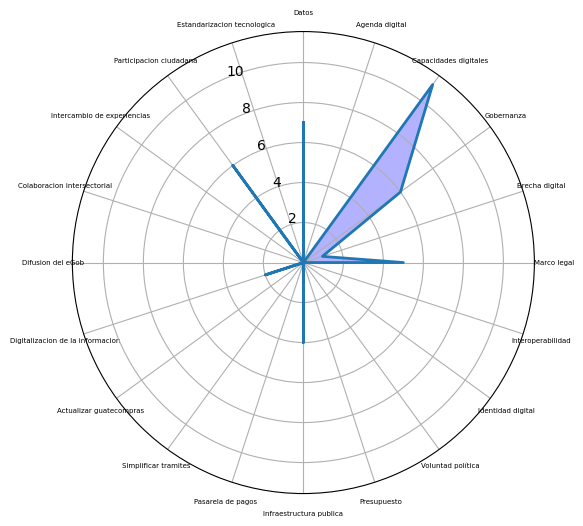

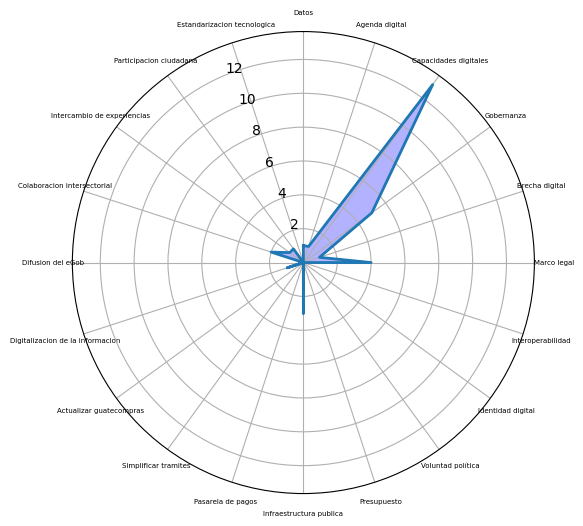

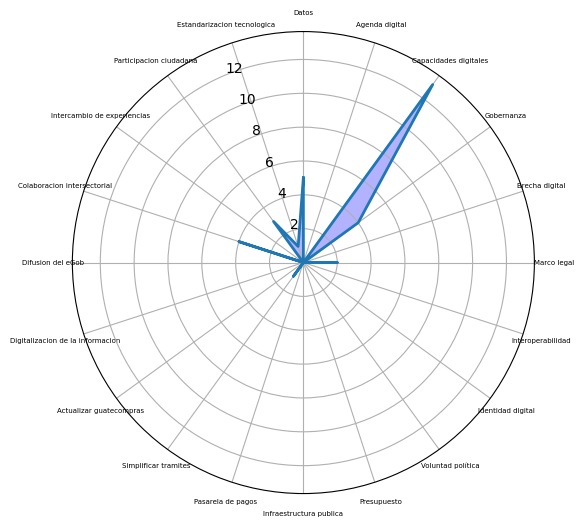

In [8]:
#graficas radiales por pregunta
f.graf_rad(p1_1)
f.graf_rad(p2_1)
f.graf_rad(p3_1)

In [25]:
#grafica radial general
total = pd.concat([p1_1.iloc[-1], p2_1.iloc[-1], p3_1.iloc[-1]], axis=1).T
suma = pd.DataFrame(total.sum()).T
total = pd.concat([total, suma]).reset_index(drop=True)
total

,Datos,Agenda digital,Capacidades digitales,Gobernanza,Brecha digital,Marco legal,Interoperabilidad,Identidad digital,Voluntad política,Presupuesto,Infraestructura publica,Pasarela de pagos,Simplificar tramites,Actualizar guatecompras,Digitalizacion de la informacion,Difusion del eGob,Colaboracion intersectorial,Intercambio de experiencias,Participacion ciudadana,Estandarizacion tecnologica
0,7,0,11,6,1,5,0,0,0,0,4,0,0,0,2,0,0,0,6,0
1,1,1,13,5,1,4,0,0,0,0,3,0,0,0,1,0,2,1,1,0
2,5,0,13,4,0,2,0,0,0,0,0,0,1,0,0,0,4,0,3,1
3,13,1,37,15,2,11,0,0,0,0,7,0,1,0,3,0,6,1,10,1


c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])


(<Figure size 600x600 with 1 Axes>, <PolarAxes: >)

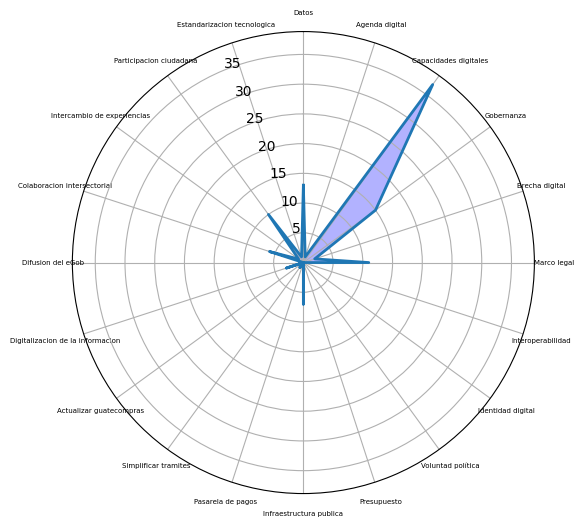

In [26]:
f.graf_rad(total)

In [ ]:
#funcion para hacer el histograma
x = 

In [9]:
#total1 = 
totales = pd.concat([resp1, p1])